<a href="https://colab.research.google.com/github/TusharNautiyal-web/CollabNotebooks/blob/main/Deep_Learning_Understanding_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN Deep Learning
**We are going to understand What is ANN**

ANN full form Aritificial Neural Networks is a deepleaarning based model and it the most simplest one out there. 


**What is early stopping.** 

Its is used for stopping a model after the values are not having any new changes automatically stop the epoch to reduce the time.

**Why Ann If we can actually solve ANN Problems using machine learning.**

Unlike many other prediction techniques, ANN does not impose any restrictions on the input variables (like how they should be distributed). Additionally, many studies have shown that ANNs can better model heteroskedasticity i.e. data with high volatility and non-constant variance, given its ability to learn hidden relationships in the data without imposing any fixed relationships in the data. This is something very useful in financial time series forecasting (e.g. stock prices) where data volatility is very high.

lets install tensor flow first

In [ ]:
pip install tensorflow-gpu --quiet

In [ ]:
import tensorflow as tf
print(tf.__version__) # Keras is already installed

2.9.1


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
data = pd.read_csv("https://drive.google.com/uc?export=download&id=1Ek6H8hZg0oUS5SErlvvajYBnwx1r6BOf")

# Understanding Data And Problem Statement.

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Dividing Data Into Independent and Dependent Features.


In [ ]:
X = data.iloc[:, 3:13]
y = data.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [ ]:
X.drop(["Geography","Gender"],axis = 1, inplace = True)

In [ ]:
X = pd.concat([X,geography,gender], axis = 1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
# Splitting of Train And Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Why Feature Scaling Is Required?

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout




In [ ]:
# Initializing ANN  artificial neural networks
classifier = Sequential()

We will start adding layers not units = inputs or features that we have are total no of inputs.

In [ ]:
classifier.add(Dense(units = 11,activation = 'relu'))
classifier.add(Dropout(0.2))

In [ ]:
# Hidden Layer 1
classifier.add(Dense(units = 7,activation = 'relu'))
classifier.add(Dropout(0.3))

In [ ]:
# Hidden Layer 2
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dropout(0.2))

In [ ]:
# Hidden Layer 3
classifier.add(Dense(units = 1,activation = 'sigmoid'))
classifier.add(Dropout(0.3))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
import tensorflow as tf
tf.keras.optimizers.Adam(learning_rate = 0.01)

# Early Stopping
We don't want all epochs to run we want to end the operation when we are done with accuracy. So if the accurcay has reached to its max then we use the concept of Early stopping.

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta = 0.0001, patience = 20, verbose = 1, mode = 'auto', baseline = None, restore_best_weights=False)

In [ ]:
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 1.4245 - accuracy: 0.6447 - val_loss: 0.5134 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 1.3909 - accuracy: 0.7634 - val_loss: 0.4872 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 1.3662 - accuracy: 0.7841 - val_loss: 0.4792 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 1.3631 - accuracy: 0.7893 - val_loss: 0.4718 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 1.2324 - accuracy: 0.7888 - val_loss: 0.4672 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 1.2733 - accuracy: 0.7940 - val_loss: 0.4617 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 1.2924 - accuracy: 0.7990 - val_loss: 0.4540 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

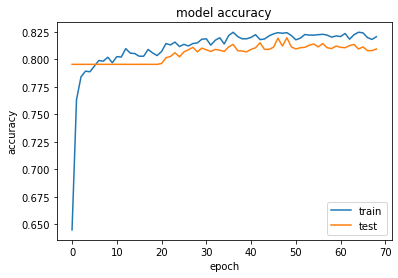

In [ ]:
plt.plot(model_history.history['accuracy']) # Test accuracy
plt.plot(model_history.history['val_accuracy']) #train accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

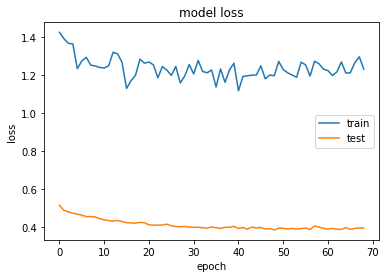

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [ ]:
 y_pred = classifier.predict(X_test)
 y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
cm

array([[1594,    1],
       [ 369,   36]])

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [ ]:
score*100 # Accuracy

81.5

In [ ]:
classifier.get_weights()

[array([[ 0.11598627,  0.10251884, -0.02568018, -0.03336727, -0.30094653,
         -0.01980769, -0.04761519, -0.06702332,  0.0049189 , -0.09852502,
          0.4212749 ],
        [-0.8236631 , -0.35688707, -0.74508965,  0.04906742, -1.2015733 ,
         -0.9233367 ,  0.02960604, -0.13026062,  0.44907793,  0.2228529 ,
         -0.2380097 ],
        [-0.01220115,  0.2463433 , -0.07315996,  0.05492952,  0.08558299,
         -0.11055284, -0.01215164, -0.01951745, -0.10382384,  0.17871258,
         -0.06869829],
        [-0.21279201, -0.62059563, -0.3642724 , -0.8698329 , -0.45827532,
         -0.05876017, -0.7250263 ,  0.10989266,  0.28742933, -0.31905097,
         -0.29065543],
        [ 0.03469127,  0.00522471,  0.03177293, -0.94130784,  0.14513046,
         -0.01802776, -0.83276826,  0.95648044,  0.17537595, -0.07381085,
          0.06588233],
        [-0.02189194, -0.06218392, -0.01178022, -0.09426638, -0.16503792,
         -0.18247664, -0.0510191 , -0.0338575 , -0.02082533,  0.0133874